In [72]:
from bertopic import BERTopic
import MyLib.nlp as nlp

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [472]:
import pandas as pd
df=pd.read_json("2023-05-15_Zotero_AI_nlp_en.json")

In [637]:

import MyLib.analysis as analysis 

from ipywidgets import interactive, interact
#This cell allows to read the words before and after a search_word. You can change the searchword & the size of the context.
@interact(search_word="sustainable",words_before=(0,10),words_after=(0,10))
def text_context(column=["text_clean","pure_text","NoStopwords"],search_word="sustainable",words_before=1,words_after=1):
    df[column].dropna().apply(analysis.Keyword_context,search_word=search_word.lower(),context=(words_before,words_after))


interactive(children=(Dropdown(description='column', options=('text_clean', 'pure_text', 'NoStopwords'), value…

In [638]:
FilterList=["eur","vrije","universiteit","ischen", "dijck","amsterdam","vu","stefan","hubers"]

df.NoStopwords=df.NoStopwords.apply(lambda x: [i for i in x if (i not in(FilterList))])

In [639]:
df["NoStop"]=df.NoStopwords.apply(lambda x: " ".join(x))

In [640]:
df['dt']=df['date'].astype(str)
df=df[df['dt'].isnull()==False]
articles = df.NoStop.to_list()
timestamp = df.date.to_list()

In [649]:
topic_model = BERTopic(language="english", nr_topics=8)
topics, probs = topic_model.fit_transform(articles)

In [650]:
topic_model.visualize_barchart(top_n_topics=8,n_words=9,height=300)

In [651]:
topic_model.visualize_topics()

In [652]:
topic_model.visualize_heatmap()

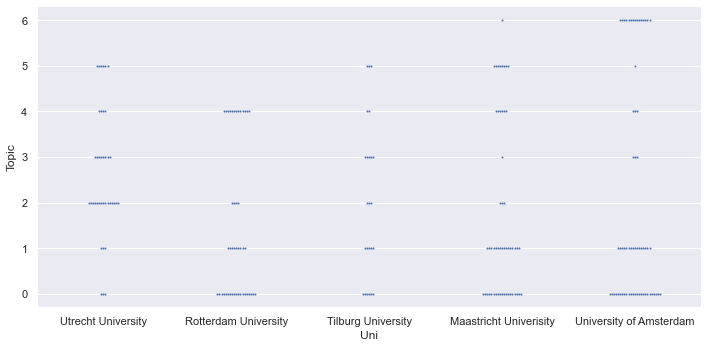

In [653]:
from matplotlib import pyplot as plt
import seaborn as sns


df2=df.join(topic_model.get_document_info(0))


selected_Unis=df2.value_counts("Uni")[:5].keys().to_list()

dfx=df2[df2.Uni.apply(lambda x: x in selected_Unis)]
dfx=dfx[dfx.Topic!=-1]
ax = sns.catplot(data=dfx, x="Uni", y="Topic", aspect=2, size=2, orient="v", kind="swarm")

In [623]:
df2["dt"]=df2['date'].dt.strftime('%Y-%m')
df2=df2.sort_values("date")
df2.dt

366    2010-01
367    2010-01
544    2019-07
543    2019-07
542    2019-07
        ...   
599        NaN
600        NaN
601        NaN
602        NaN
603        NaN
Name: dt, Length: 613, dtype: object

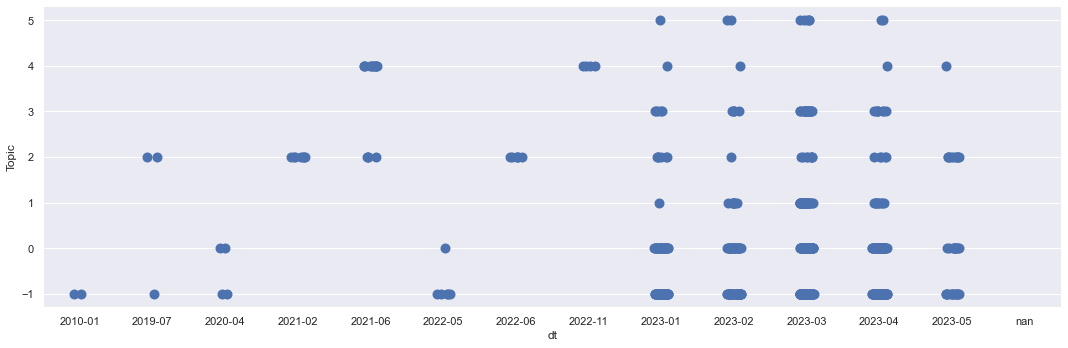

In [624]:
from matplotlib import pyplot as plt
import seaborn as sns


ax = sns.catplot(data=df2, x="dt", y="Topic", aspect=3, size=10)




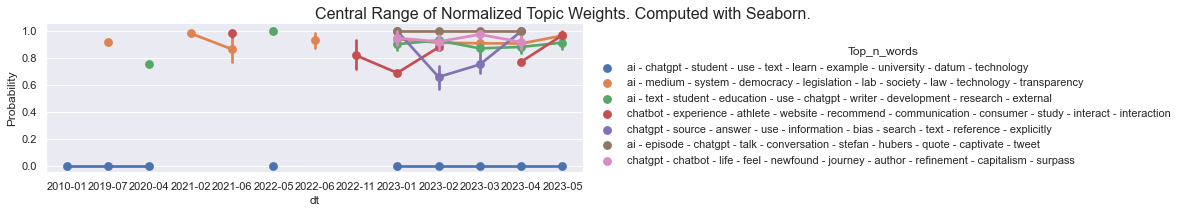

In [625]:

def create_pointplot(df, y_value, hue=None, col=None, wrap=None, size=5, aspect=1.5, title=""):
    p = sns.catplot(x="dt", y=y_value, kind='point', height=size, hue=hue, 
                       col=col, col_wrap=wrap, aspect=aspect, data=df2)
    p.fig.subplots_adjust(top=0.9)
    p.fig.suptitle(title, fontsize=16)
    return p



create_pointplot(df3, 'Probability', aspect=3, hue='Top_n_words',size=3,
                 title="Central Range of Normalized Topic Weights. Computed with Seaborn.")


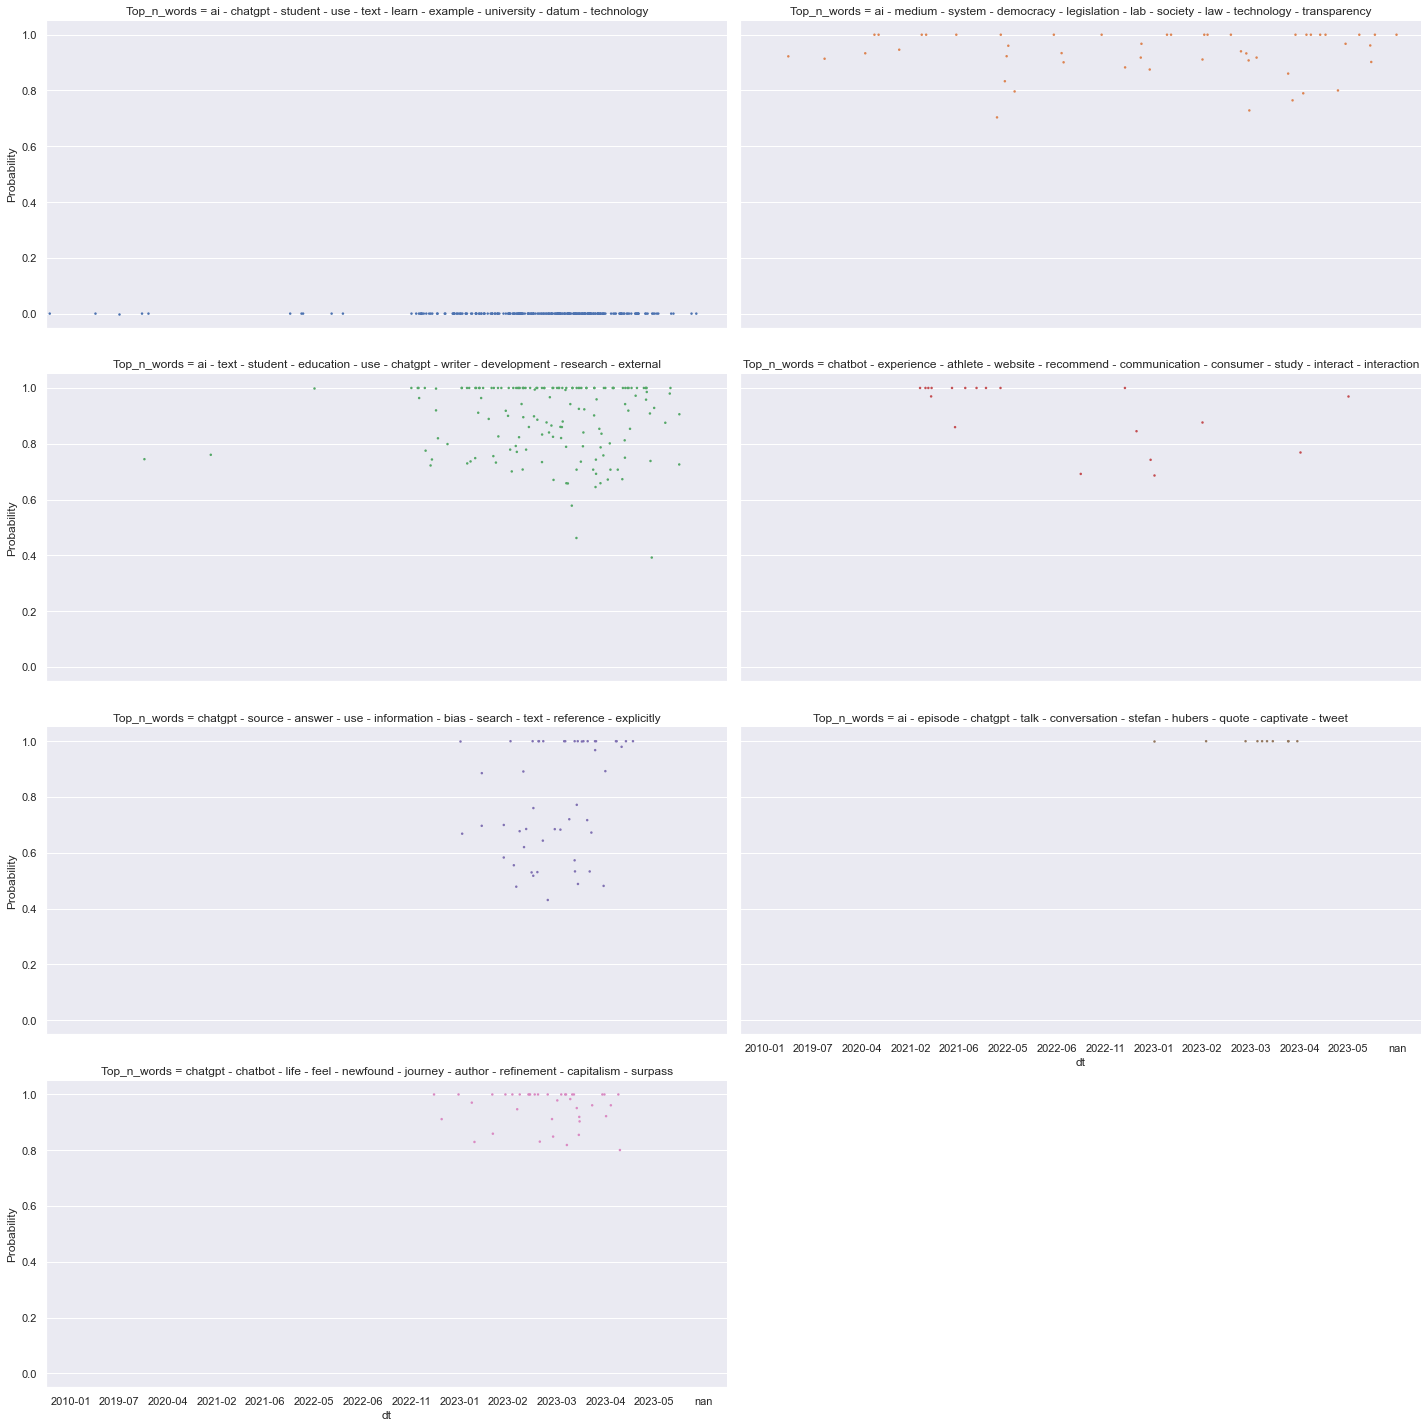

In [626]:
p = sns.catplot(x="dt", y='Probability', hue="Top_n_words", col='Top_n_words', col_wrap=2, 
                   kind='strip', size=2.5, aspect=2, jitter=1, data=df2)